In [21]:
%run data_preparation.ipynb

Accessible dataframes    Description                            # of columns  
data_2019                Gives data for 2019-Baseline           15
data_2024                Gives data for 2024                    13
station_data             Existing stations in NYC from Lyft      6


In [22]:
data_2019.iloc[:4]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,320,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1
1,316,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1
2,591,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1
3,2719,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1


In [23]:
data_2019['tripduration_minutes'] = data_2019['tripduration'] / 60
data_2019.iloc[:4]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_minutes
0,320,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1,5.333333
1,316,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1,5.266667
2,591,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1,9.850000
3,2719,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1,45.316667


In [24]:
usertype_stats = data_2019['usertype'].describe()
usertype_counts = data_2019['usertype'].value_counts()

print(usertype_stats)
print(usertype_counts)

count       20551697
unique             2
top       Subscriber
freq        17679521
Name: usertype, dtype: object
usertype
Subscriber    17679521
Customer       2872176
Name: count, dtype: int64


In [25]:
startstation_stats = data_2019['start station id'].describe()
startstation_counts = data_2019['start station id'].value_counts()

print(startstation_stats)
print(startstation_counts)

count    2.055152e+07
mean     1.663465e+03
std      1.477337e+03
min      7.200000e+01
25%      3.820000e+02
50%      5.140000e+02
75%      3.295000e+03
max      3.911000e+03
Name: start station id, dtype: float64
start station id
519.0     156575
497.0     121781
3255.0    119958
402.0     113138
285.0     113012
           ...  
3902.0         8
3250.0         6
3909.0         6
3245.0         6
488.0          3
Name: count, Length: 936, dtype: int64


## Membership VS trip duration

In [26]:
summary_stats = data_2019.groupby('usertype')['tripduration_minutes'].describe()
print(summary_stats)

                 count       mean         std       min        25%        50%  \
usertype                                                                        
Customer     2872176.0  35.055767  389.585562  1.016667  12.133333  19.966667   
Subscriber  17679521.0  13.257736  106.005211  1.016667   5.633333   9.300000   

                  75%           max  
usertype                             
Customer    28.183333  63544.433333  
Subscriber  15.716667  55071.033333  


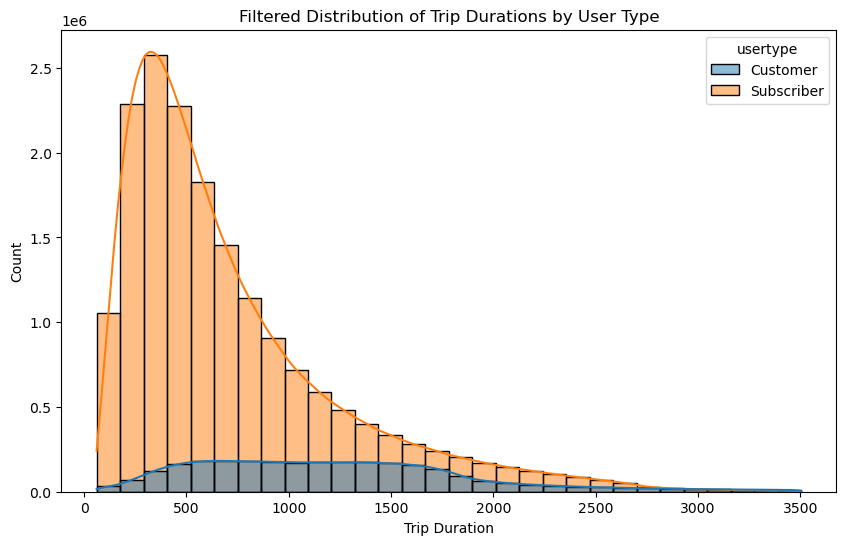

In [8]:
# Define a reasonable threshold or use statistical methods to identify outliers
threshold = data_2019['tripduration'].quantile(0.99)  # for example, remove the top 1% of durations

# Filter out values above the threshold
filtered_df = data_2019[data_2019['tripduration'] <= threshold]

# Plot the histogram of the filtered data
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x='tripduration', hue='usertype', bins=30, kde=True)
plt.title('Filtered Distribution of Trip Durations by User Type')
plt.xlabel('Trip Duration')
plt.ylabel('Count')
plt.show()

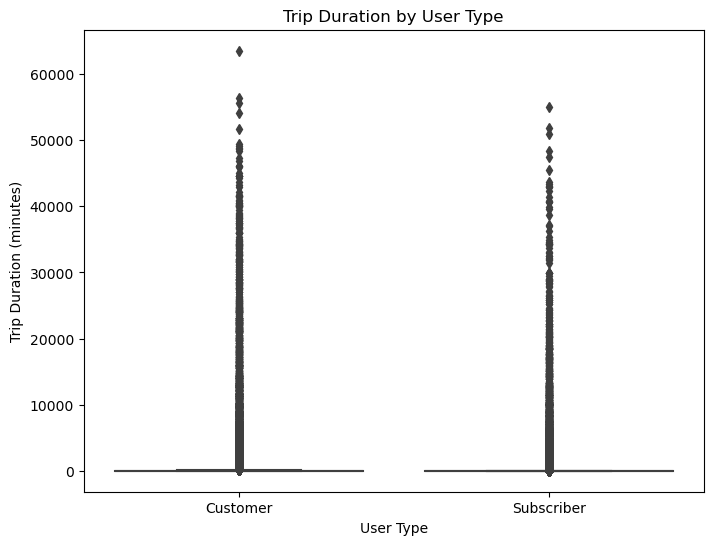

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_2019, x='usertype', y='tripduration_minutes')
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (minutes)')
plt.show()

## Membership VS Age

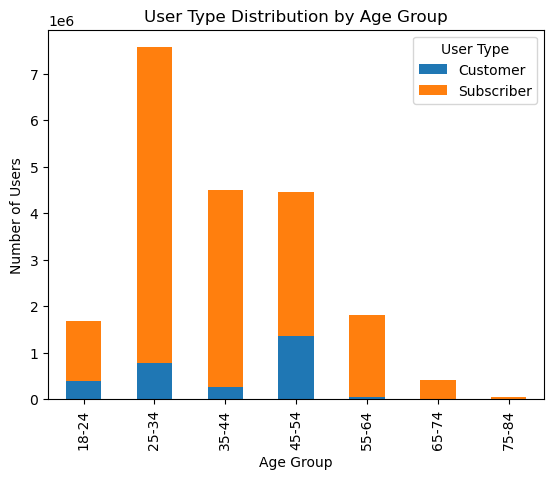

In [28]:
data_2019['age'] = 2019 - data_2019['birth year']
data_2019['age_group'] = pd.cut(data_2019['age'], bins=[18, 25, 35, 45, 55, 65, 75, 85], right=False, labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84'])

age_group_distribution = data_2019.groupby(['age_group', 'usertype']).size().unstack().fillna(0)
age_group_distribution.plot(kind='bar', stacked=True)
plt.title('User Type Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.legend(title='User Type')
plt.show()

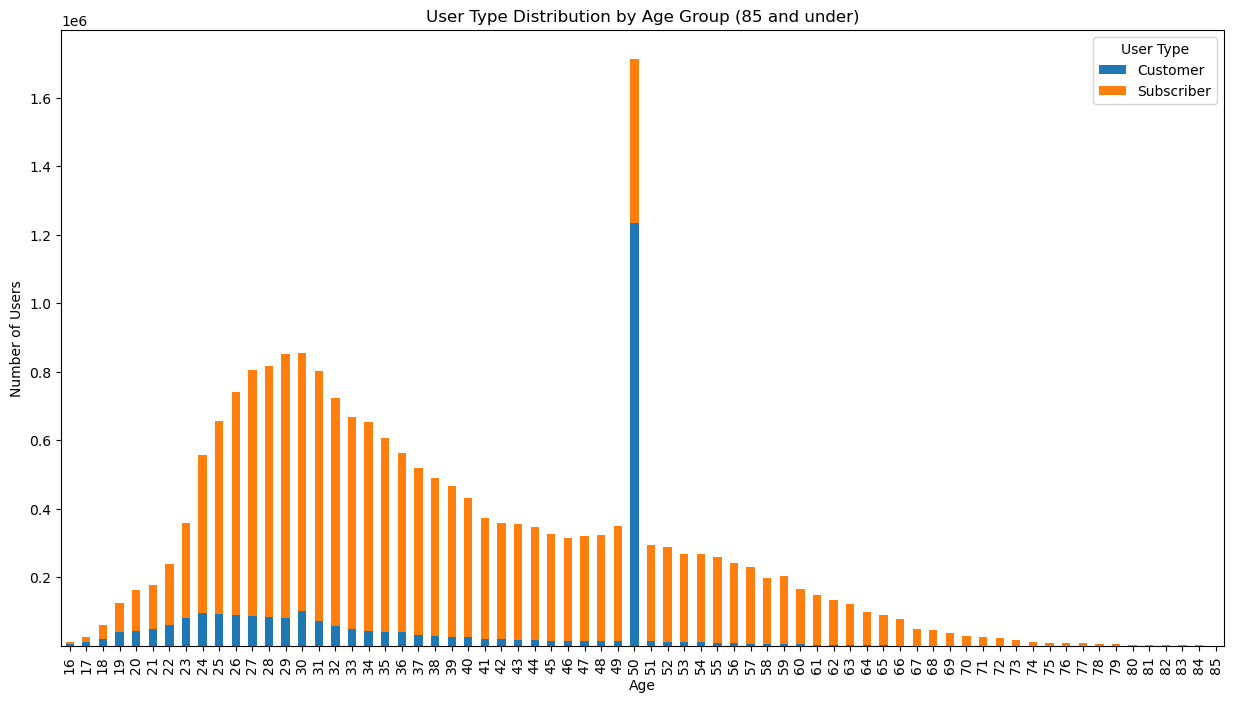

In [11]:
data_2019['age'] = 2019 - data_2019['birth year']
# Filter out ages above 85
filtered_data = data_2019[data_2019['age'] <= 85]

# Now perform the groupby operation on the filtered data
age_group_distribution = filtered_data.groupby(['age', 'usertype']).size().unstack().fillna(0)

# Plot the distribution
age_group_distribution.plot(kind='bar', stacked=True, figsize=(15, 8))  # Adjusted for better visibility
plt.title('User Type Distribution by Age Group (85 and under)')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.legend(title='User Type')
plt.show()

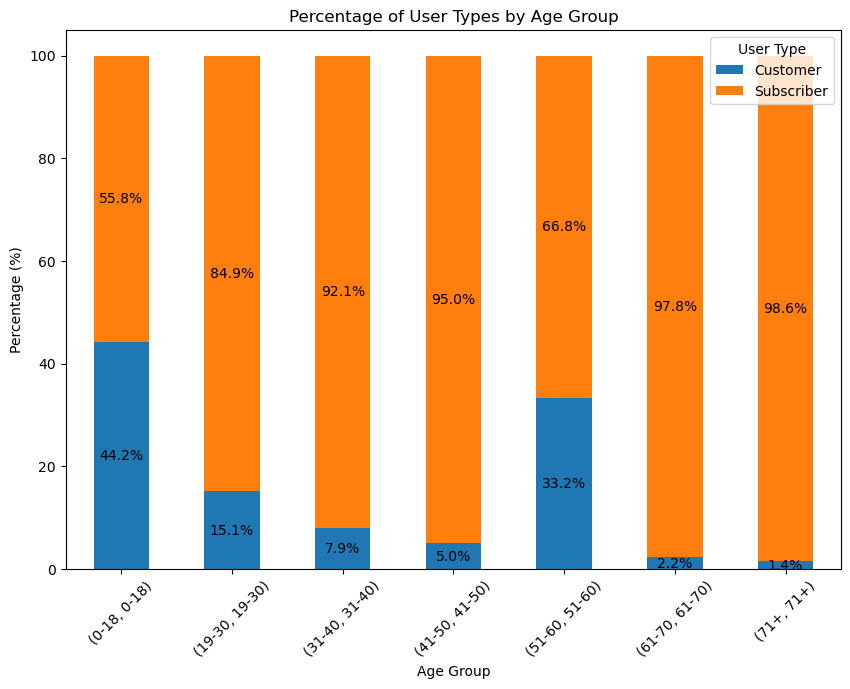

In [12]:
# Assuming 'age' column exists in your DataFrame
# Categorize ages into bins
bins = [0, 18, 30, 40, 50, 60, 70, 120]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71+']
data_2019['age_group'] = pd.cut(data_2019['age'], bins=bins, labels=labels, right=False)

# Calculate the percentage of each user type within each age group
agegroup_usertype_percentage = data_2019.groupby(['age_group', 'usertype']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().fillna(0)

# Plot
ax = agegroup_usertype_percentage.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Percentage of User Types by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')

# Adding percentage annotations on the bars
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    if height > 0:
        label_text = f'{height:.1f}%'
        label_x = x + width / 2
        label_y = y + height / 2
        ax.text(label_x, label_y, label_text, ha='center', va='center')

plt.legend(title='User Type')
plt.xticks(rotation=45)
plt.show()

In [13]:
summary_stats = data_2019['birth year'].describe()
print(summary_stats)

count    2.055170e+07
mean     1.980200e+03
std      1.213296e+01
min      1.857000e+03
25%      1.970000e+03
50%      1.983000e+03
75%      1.990000e+03
max      2.003000e+03
Name: birth year, dtype: float64


## Membership VS gender

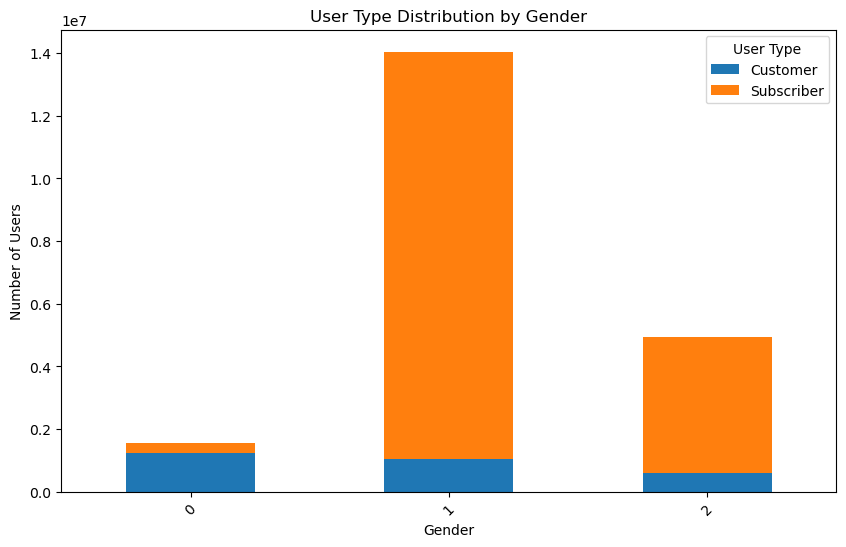

In [14]:
# Assuming there's a 'gender' column with appropriate labels
gender_distribution = data_2019.groupby(['gender', 'usertype']).size().unstack().fillna(0)
ax = gender_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('User Type Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.legend(title='User Type')
plt.xticks(rotation=45)
plt.show()

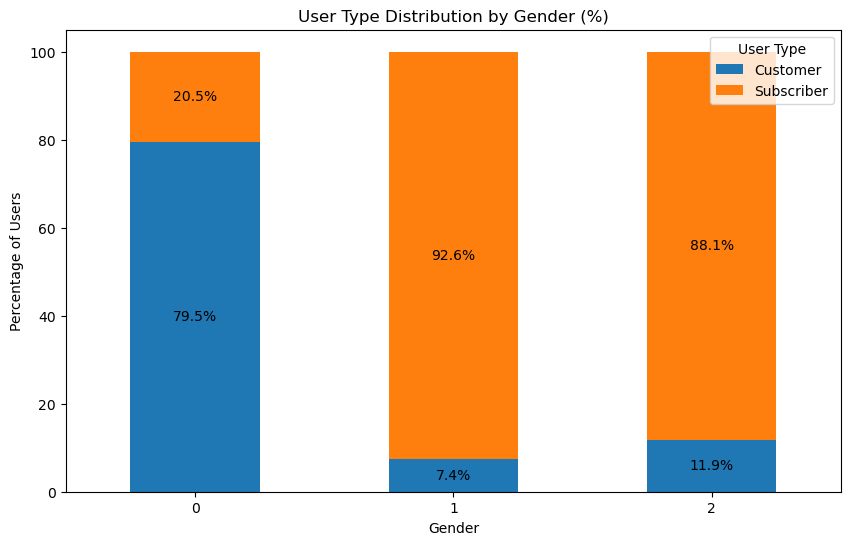

In [15]:
# Calculate the count of each user type within each gender
gender_usertype_counts = data_2019.groupby(['gender', 'usertype']).size().reset_index(name='count')

# Calculate the total counts by gender to normalize counts to percentages
total_counts_by_gender = data_2019.groupby('gender').size().reset_index(name='total_count')

# Merge the count dataframes
merged_df = pd.merge(gender_usertype_counts, total_counts_by_gender, on='gender')

# Calculate the percentage
merged_df['percentage'] = (merged_df['count'] / merged_df['total_count']) * 100

# Create a pivot table for plotting
pivot_df = merged_df.pivot(index='gender', columns='usertype', values='percentage')

# Plotting the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding titles and labels
plt.title('User Type Distribution by Gender (%)')
plt.xlabel('Gender')
plt.ylabel('Percentage of Users')

# Customizing the legend
plt.legend(title='User Type')

# Annotating the bars with percentages
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='center')

plt.xticks(rotation=0)  # Keep the gender names horizontal for better readability

plt.show()

## Membership VS Station

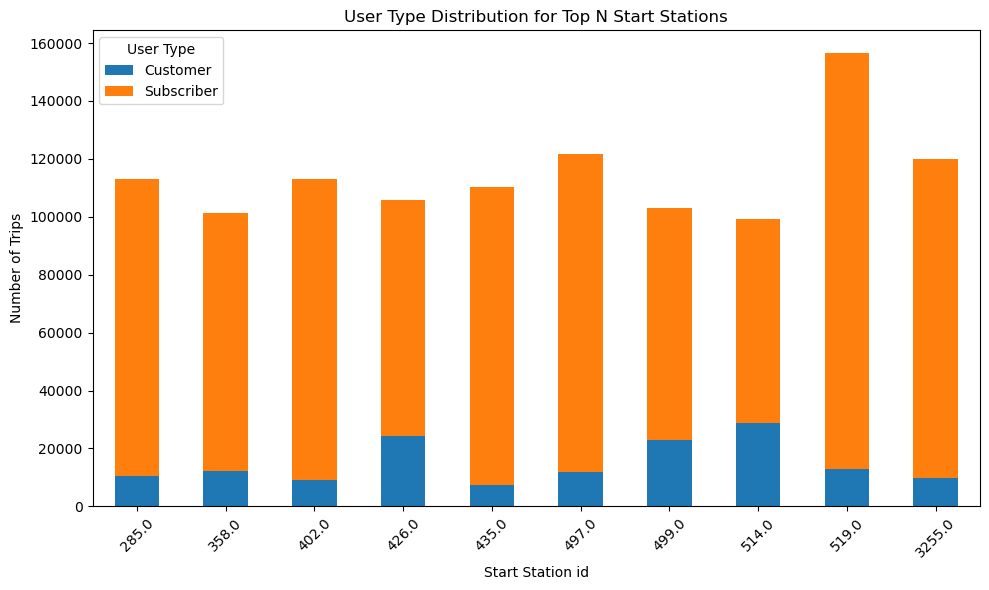

In [16]:
# Determine the top N stations for analysis
N = 10
top_stations = data_2019['start station id'].value_counts().head(N).index

# Filter the dataset for trips starting from these top stations
top_stations_data = data_2019[data_2019['start station id'].isin(top_stations)]

# Analyze user type distribution for these stations
top_stations_user_type = top_stations_data.groupby(['start station id', 'usertype']).size().unstack().fillna(0)

# Plotting
top_stations_user_type.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('User Type Distribution for Top N Start Stations')
plt.ylabel('Number of Trips')
plt.xlabel('Start Station id')
plt.xticks(rotation=45)
plt.legend(title='User Type')
plt.tight_layout()
plt.show()

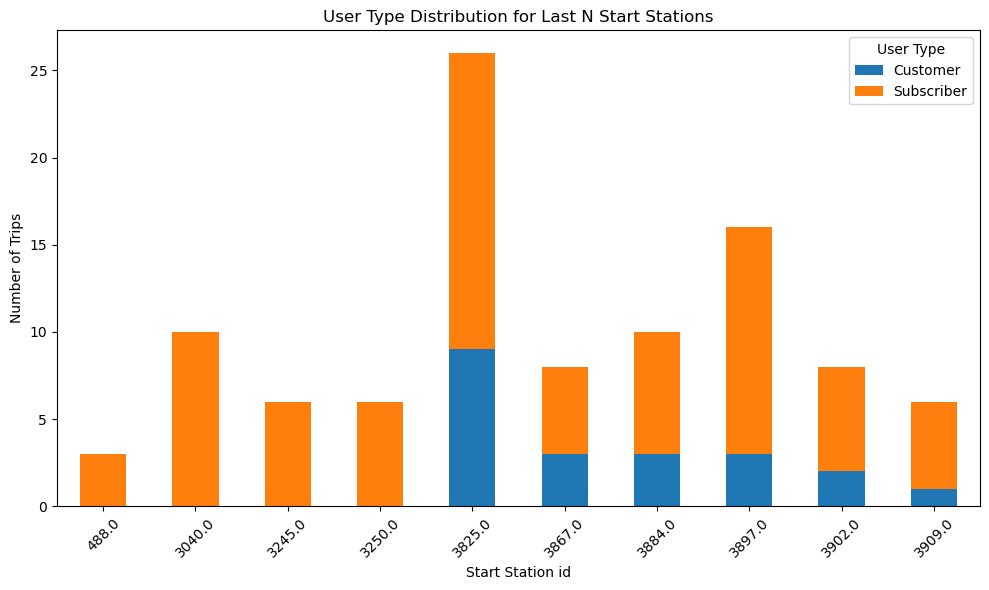

In [16]:
# Determine the last N stations for analysis
N = 10
last_stations = data_2019['start station id'].value_counts().tail(N).index

# Filter the dataset for trips starting from these top stations
last_stations_data = data_2019[data_2019['start station id'].isin(last_stations)]

# Analyze user type distribution for these stations
last_stations_user_type = last_stations_data.groupby(['start station id', 'usertype']).size().unstack().fillna(0)

# Plotting
last_stations_user_type.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('User Type Distribution for Last N Start Stations')
plt.ylabel('Number of Trips')
plt.xlabel('Start Station id')
plt.xticks(rotation=45)
plt.legend(title='User Type')
plt.tight_layout()
plt.show()


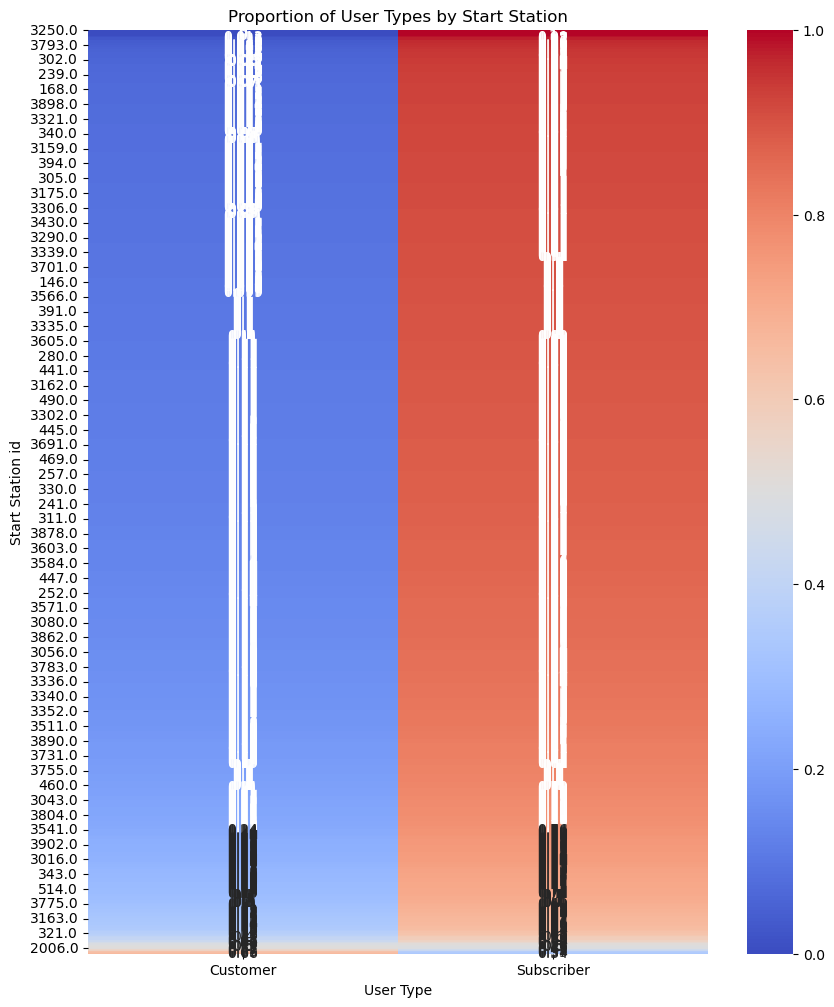

In [17]:
import seaborn as sns

# Calculating proportions of user types for each station
user_type_proportions = data_2019.groupby('start station id')['usertype'].value_counts(normalize=True).unstack().fillna(0)

# Sorting by one of the user types for visualization purposes
user_type_proportions_sorted = user_type_proportions.sort_values('Subscriber', ascending=False)

# Creating the heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(user_type_proportions_sorted, annot=True, cmap='coolwarm')
plt.title('Proportion of User Types by Start Station')
plt.ylabel('Start Station id')
plt.xlabel('User Type')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
station_locations = data_2019[['start station latitude', 'start station longitude']].drop_duplicates()



# Choose the number of clusters using the Elbow Method
sse = []
for k in range(1, 11):  # Test a range of cluster counts
    kmeans = KMeans(n_clusters=k, random_state=0).fit(station_locations)
    sse.append(kmeans.inertia_)
    
station_locations['cluster'] = kmeans.labels_
    
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Assuming the elbow is at, say, K=5 (this is just an example, you need to choose based on your plot)
k = 5  # Update based on your Elbow Method result
kmeans = KMeans(n_clusters=k, random_state=0).fit(station_locations)

# Assign cluster labels back to the original data
station_locations['cluster'] = kmeans.labels_

# Now, you can merge this cluster information back to your original data and analyze user types by cluster
data_2019_with_clusters = data_2019.merge(station_locations, on=['start station latitude', 'start station longitude'], how='left')

# Analyze user type by cluster
user_type_by_cluster = data_2019_with_clusters.groupby('cluster')['usertype'].value_counts(normalize=True).unstack().fillna(0)
print(user_type_by_cluster)

In [ ]:
import folium

# Create a map centered around New York City
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add markers for the centroids of each cluster or each station
for idx, row in station_locations.iterrows():
    folium.Marker([row['start station latitude'], row['start station longitude']],
                  popup=f'Cluster {row["cluster"]}').add_to(nyc_map)

nyc_map

In [18]:
def assign_cluster(lat, lon):
    if 40.7075 <= lat <= 40.7145 and -74.0183 <= lon <= -74.0043:
        return 'Financial District'
    elif 40.8115 <= lat <= 40.8285 and -73.9565 <= lon <= -73.9365:
        return 'Harlem'
    elif 40.7736 <= lat <= 40.7836 and -73.9666 <= lon <= -73.9466:
        return 'Upper East Side'
    elif 40.7870 <= lat <= 40.7970 and -73.9854 <= lon <= -73.9654:
        return 'Upper West Side'
    elif 40.7549 <= lat <= 40.7649 and -73.9940 <= lon <= -73.9740:
        return 'Midtown'
    elif 40.7465 <= lat <= 40.7565 and -74.0114 <= lon <= -73.9914:
        return 'Chelsea'
    elif 40.7330 <= lat <= 40.7430 and -74.0127 <= lon <= -73.9927:
        return 'Greenwich Village'
    elif 40.7081 <= lat <= 40.7181 and -73.9671 <= lon <= -73.9471:
        return 'Williamsburg'
    elif 40.6958 <= lat <= 40.7058 and -74.0065 <= lon <= -73.9865:
        return 'Brooklyn Heights'
    elif 40.6711 <= lat <= 40.6811 and -73.9916 <= lon <= -73.9716:
        return 'Park Slope'
    elif 40.7644 <= lat <= 40.7744 and -73.9335 <= lon <= -73.9135:
        return 'Astoria'
    elif 40.7621 <= lat <= 40.7721 and -73.8376 <= lon <= -73.8176:
        return 'Flushing'
    elif 40.7447 <= lat <= 40.7547 and -73.9585 <= lon <= -73.9385:
        return 'Long Island City'
    elif 40.9030 <= lat <= 40.9130 and -73.9241 <= lon <= -73.9041:
        return 'Riverdale'
    elif 40.8620 <= lat <= 40.8720 and -73.8957 <= lon <= -73.8757:
        return 'Fordham'
    elif 40.6437 <= lat <= 40.6537 and -74.0832 <= lon <= -74.0632:
        return 'St. George'
    elif 40.5123 <= lat <= 40.5223 and -74.2615 <= lon <= -74.2415:
        return 'Tottenville'
    else:
        return 'Other'

# Apply the function to your DataFrame
# Assuming 'data_2019' is your DataFrame with station coordinates
data_2019['cluster'] = data_2019.apply(lambda row: assign_cluster(row['start station latitude'], row['start station longitude']), axis=1)
data_2019.iloc[:4]


KeyboardInterrupt



In [ ]:
summary_stats = data_2019['cluster'].describe()
print(summary_stats)

In [ ]:
startstation_distribution = data_2019.groupby(['cluster', 'usertype']).size().unstack().fillna(0)
ax = startstation_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('User Type Distribution by Start Station Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Users')
plt.legend(title='User Type')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculate the count of each user type within each gender
startcluster_usertype_counts = data_2019.groupby(['cluster', 'usertype']).size().reset_index(name='count')

# Calculate the total counts by gender to normalize counts to percentages
total_counts_by_startcluster = data_2019.groupby('cluster').size().reset_index(name='total_count')

# Merge the count dataframes
merged_df = pd.merge(startcluster_usertype_counts, total_counts_by_startcluster, on='cluster')

# Calculate the percentage
merged_df['percentage'] = (merged_df['count'] / merged_df['total_count']) * 100

# Create a pivot table for plotting
pivot_df = merged_df.pivot(index='cluster', columns='usertype', values='percentage')

# Plotting the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding titles and labels
plt.title('User Type Distribution by Start Station Neighbourhood (%)')
plt.xlabel('Start Station Neighbourhood')
plt.ylabel('Percentage of Users')

# Customizing the legend
plt.legend(title='User Type')

# Annotating the bars with percentages
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='center')

plt.show()

In [ ]:
import folium

# Create a map centered around New York City
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Define the boundaries for the neighborhoods (these are rough estimates and may not be accurate)
neighborhoods = {
    'Financial District': [[40.7075, -74.0183], [40.7145, -74.0043]],
    'Harlem': [[40.8115, -73.9565], [40.8285, -73.9365]],
    'Upper East Side': [[40.7736, -73.9666], [40.7836, -73.9466]],
    'Upper West Side': [[40.7870, -73.9854], [40.7970, -73.9654]],
    'Midtown': [[40.7549, -73.9940], [40.7649, -73.9740]],
    'Chelsea': [[40.7465, -74.0114], [40.7565, -73.9914]],
    'Greenwich Village': [[40.7330, -74.0127], [40.7430, -73.9927]],
    'Williamsburg': [[40.7081, -73.9671], [40.7181, -73.9471]],
    'Brooklyn Heights': [[40.6958, -74.0065], [40.7058, -73.9865]],
    'Park Slope': [[40.6711, -73.9916], [40.6811, -73.9716]],
    'Astoria': [[40.7644, -73.9335], [40.7744, -73.9135]],
    'Flushing': [[40.7621, -73.8376], [40.7721, -73.8176]],
    'Long Island City': [[40.7447, -73.9585], [40.7547, -73.9385]],
    'Riverdale': [[40.9030, -73.9241], [40.9130, -73.9041]],
    'Fordham': [[40.8620, -73.8957], [40.8720, -73.8757]],
    'St. George': [[40.6437, -74.0832], [40.6537, -74.0632]],
    'Tottenville': [[40.5123, -74.2615], [40.5223, -74.2415]]
}

# Add rectangles for the neighborhood boundaries
for neighborhood, ((lat_min, lon_min), (lat_max, lon_max)) in neighborhoods.items():
    folium.Rectangle(
        bounds=[[lat_min, lon_min], [lat_max, lon_max]],
        color='#ff7800',
        fill=True,
        fill_color='#ffff00',
        fill_opacity=0.2,
        popup=neighborhood
    ).add_to(nyc_map)

# Add markers for the centroids of each cluster or each station
for idx, row in data_2019.iterrows():
    folium.Marker(
        [row['start station latitude'], row['start station longitude']],
        popup=f'Station: {row["start station name"]} Cluster: {row["cluster"]}'
    ).add_to(nyc_map)

# Display the map
nyc_map

In [ ]:
station_locations.iloc[:4]

# Neighbourhood study

In [29]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
data_2019.shape

(20551697, 18)

### Counting Trips

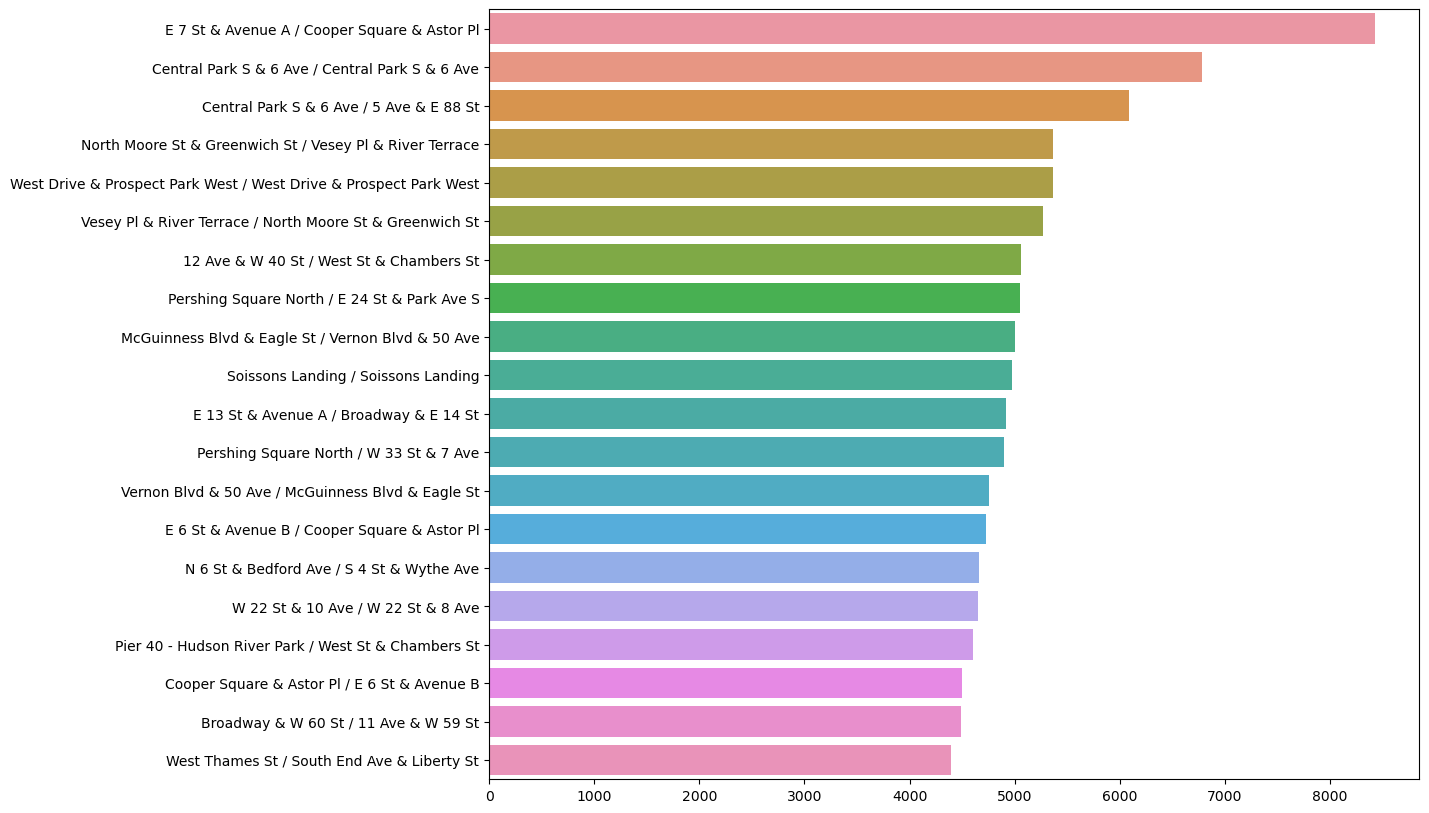

In [30]:
trips=data_2019.value_counts(['start station name','end station name'])[:20]
trip_names=[trips.index[t][0] + ' / ' + trips.index[t][1] for t in range(len(trips))]
plt.figure(figsize=(12,10))
sns.barplot( x= list(trips.values), y = trip_names, orient="h") ;

ommit loopings (start and end is same station)

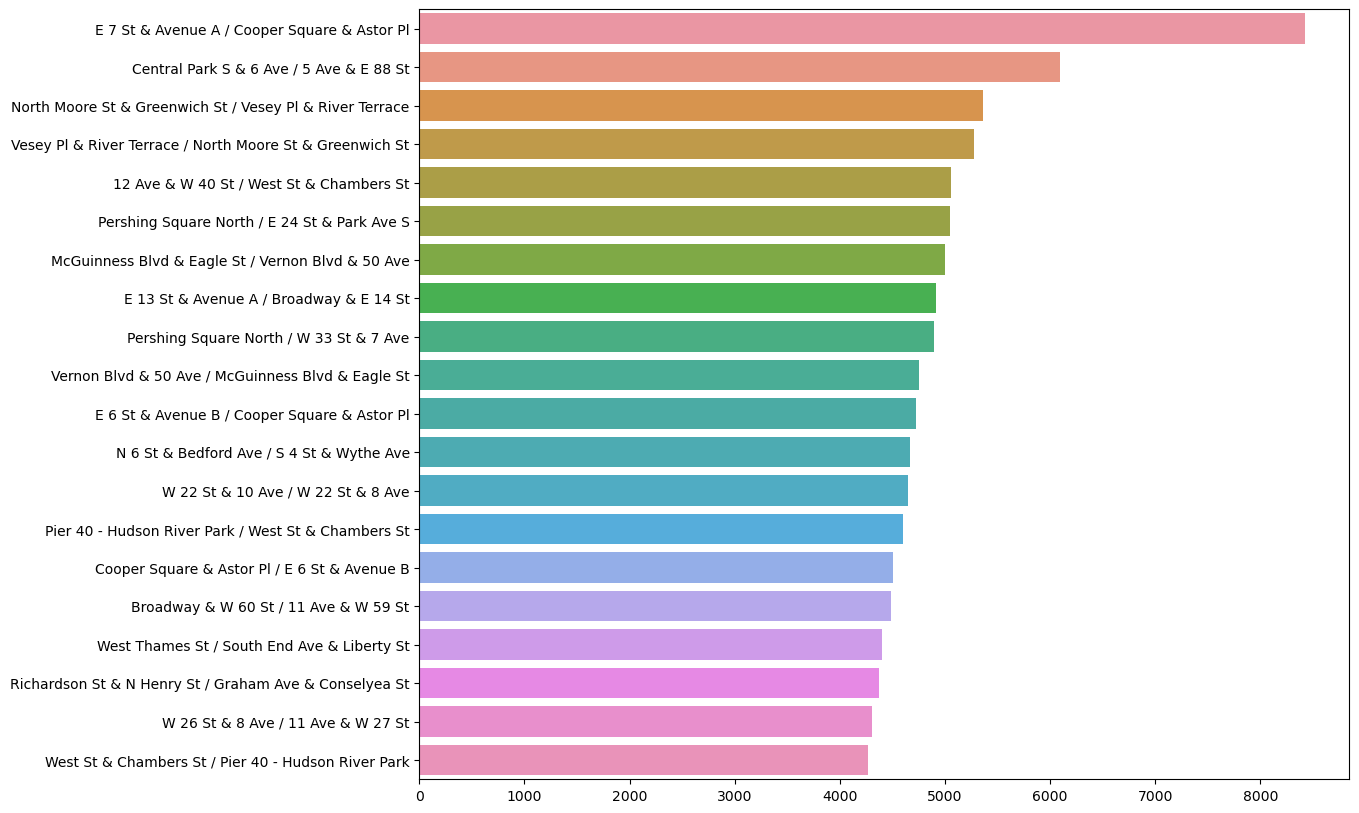

In [31]:
# Assuming data_2019 is already loaded and has appropriate data types
# Filter and count the top 20 directly, possibly more memory efficient
trips = data_2019[data_2019['start station id'] != data_2019['end station id']] \
    .value_counts(['start station name', 'end station name'], sort=True)[:20]

# Prepare data for plotting
trip_names = [f'{start} / {end}' for start, end in trips.index]
trip_counts = trips.values

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(x=trip_counts, y=trip_names, orient="h")
plt.show()

### Reverse geocoding

In [35]:
geolocator = Nominatim(user_agent="bikeshare")
reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1, max_retries=0)
reverse("40.75029943702441, -73.99221868612786").raw['address']

{'amenity': 'The Pennsy Food Hall',
 'road': 'Plaza 33',
 'neighbourhood': 'Chelsea',
 'suburb': 'Manhattan',
 'county': 'New York County',
 'city': 'City of New York',
 'state': 'New York',
 'ISO3166-2-lvl4': 'US-NY',
 'postcode': '10121',
 'country': 'United States',
 'country_code': 'us'}

In [36]:
dfs=data_2019[['start station id','start station name','start station latitude','start station longitude']]\
.drop_duplicates(subset = ['start station id'])

In [37]:
dfs.columns=['stationid','station name','latitude','longitude']
dfs.set_index('stationid', inplace=True)
dfs

,station name,latitude,longitude
stationid,,,
3160.0,Central Park West & W 76 St,40.778968,-73.973747
519.0,Pershing Square North,40.751873,-73.977706
3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673
504.0,1 Ave & E 16 St,40.732219,-73.981656
229.0,Great Jones St,40.727434,-73.993790
...,...,...,...
3740.0,W Broadway & W Houston St,40.726378,-74.000472
3884.0,Centre St & Seneca Ave,40.699690,-73.902200
3910.0,Greene Ave & Grandview Ave,40.709697,-73.907856


### Reverse geocode stations

In [38]:
locations=[]
for index, row in dfs.iterrows():
    locations.append(reverse("{}, {}".format(row['latitude'], row['longitude'])).raw['address'])
pd.DataFrame(locations[:10])

,tourism,house_number,road,neighbourhood,suburb,county,city,state,ISO3166-2-lvl4,postcode,country,country_code,amenity
0,New-York Historical Society,170,Central Park West,Manhattan Community Board 7,Manhattan,New York County,City of New York,New York,US-NY,10024,United States,us,NaN
1,NaN,NaN,Pershing Square Plaza,Manhattan Community Board 5,Manhattan,New York County,City of New York,New York,US-NY,10178,United States,us,NaN
2,NaN,465,Amsterdam Avenue,Manhattan Community Board 7,Manhattan,New York County,City of New York,New York,US-NY,10024,United States,us,NaN
3,NaN,NaN,1st Avenue service road,Manhattan Community Board 6,Manhattan,New York County,City of New York,New York,US-NY,10009,United States,us,Citi Bike - 1st Avenue & East 15th Street
4,NaN,NaN,Great Jones Street,Manhattan Community Board 2,Manhattan,New York County,City of New York,New York,US-NY,10012,United States,us,Citi Bike - Great Jones St
5,NaN,301,West 115th Street,Manhattan Community Board 10,Manhattan,New York County,City of New York,New York,US-NY,10026,United States,us,NaN
6,NaN,NaN,3rd Avenue,Manhattan Community Board 8,Manhattan,New York County,City of New York,New York,US-NY,10128,United States,us,Citi Bike - 3rd Avenue & East 95th Street
7,NaN,NaN,Broadway,Manhattan Community Board 2,Manhattan,New York County,City of New York,New York,US-NY,10003,United States,us,Citi Bike - Broadway & East 14th Street
8,NaN,NaN,Columbia Street,Red Hook,Brooklyn,NaN,City of New York,New York,US-NY,11231,United States,us,Citi Bike - Columbia Street & West 9th Street
9,NaN,NaN,East 7th Street,Manhattan Community Board 3,Manhattan,New York County,City of New York,New York,US-NY,10009,United States,us,Citi Bike - East 7th Street & Avenue A


In [39]:
dfstations = pd.DataFrame(index=dfs.index, data=locations,\
                          columns=['neighbourhood','suburb','postcode'])
dfstations.rename(columns={"neighbourhood":"neighborhood" , "suburb": "boro", "postcode": "zipcode"}\
                  ,inplace=True )
dfstations['zipcode'] = dfstations['zipcode'].str[:5].astype('category')

dfstations['neighborhood'] = dfstations['neighborhood'].astype('category')
dfstations['boro'] = dfstations['boro'].astype('category')
dfstations[['station name','latitude','longitude']] = dfs[['station name','latitude','longitude']]
dfstations.head(10)

,neighborhood,boro,zipcode,station name,latitude,longitude
stationid,,,,,,
3160.0,Manhattan Community Board 7,Manhattan,10024,Central Park West & W 76 St,40.778968,-73.973747
519.0,Manhattan Community Board 5,Manhattan,10178,Pershing Square North,40.751873,-73.977706
3171.0,Manhattan Community Board 7,Manhattan,10024,Amsterdam Ave & W 82 St,40.785247,-73.976673
504.0,Manhattan Community Board 6,Manhattan,10009,1 Ave & E 16 St,40.732219,-73.981656
229.0,Manhattan Community Board 2,Manhattan,10012,Great Jones St,40.727434,-73.993790
3630.0,Manhattan Community Board 10,Manhattan,10026,Frederick Douglass Blvd & W 115 St,40.803865,-73.955931
3675.0,Manhattan Community Board 8,Manhattan,10128,3 Ave & E 95 St,40.784597,-73.949685
285.0,Manhattan Community Board 2,Manhattan,10003,Broadway & E 14 St,40.734546,-73.990741
3394.0,Red Hook,Brooklyn,11231,Columbia St & W 9 St,40.676999,-74.006471


In [41]:
neighborhoods_df = pd.read_csv('nyc-zip-codes.csv')
neighborhoods_df.iloc[:4]

,Borough,Neighborhood,ZipCode
0,Bronx,Central Bronx,10453
1,Bronx,Central Bronx,10457
2,Bronx,Central Bronx,10460
3,Bronx,Bronx Park and Fordham,10458


In [42]:

dfstations_reset = dfstations.reset_index()
# Ensure that the 'zipcode' columns in both DataFrames are of the same data type
dfstations_reset['zipcode'] = dfstations_reset['zipcode'].astype(str)
neighborhoods_df['ZipCode'] = neighborhoods_df['ZipCode'].astype(str)

# Merge the original DataFrame with the neighborhoods DataFrame based on 'zipcode'
merged_dfstations = pd.merge(dfstations_reset, neighborhoods_df, left_on='zipcode', right_on='ZipCode', how='left')

# 'merged_df' now contains the original data along with the corresponding neighborhood for each zip code
# You might have both 'zipcode' and 'zip' columns in 'merged_df', you can drop one if needed
merged_dfstations.drop('ZipCode', axis=1, inplace=True)  # This removes the 'zip' column if it's redundant

In [43]:
merged_dfstations.iloc[:4]

,stationid,neighborhood,boro,zipcode,station name,latitude,longitude,Borough,Neighborhood
0,3160.0,Manhattan Community Board 7,Manhattan,10024,Central Park West & W 76 St,40.778968,-73.973747,Manhattan,Upper West Side
1,519.0,Manhattan Community Board 5,Manhattan,10178,Pershing Square North,40.751873,-73.977706,Manhattan,Gramercy Park and Murray Hill
2,3171.0,Manhattan Community Board 7,Manhattan,10024,Amsterdam Ave & W 82 St,40.785247,-73.976673,Manhattan,Upper West Side
3,504.0,Manhattan Community Board 6,Manhattan,10009,1 Ave & E 16 St,40.732219,-73.981656,Manhattan,Lower East Side


In [44]:
merged_dfstations.drop('neighborhood', axis=1, inplace=True)
merged_dfstations.drop('Borough', axis=1, inplace=True)

In [45]:
nan_count = merged_dfstations['Neighborhood'].isna().sum()
print(f"Number of NaNs in the 'neighborhood' column: {nan_count}")

Number of NaNs in the 'neighborhood' column: 10


In [46]:
unique_nan_zipcodes = merged_dfstations[merged_dfstations['Neighborhood'].isna()]['station name'].unique()
print(unique_nan_zipcodes)

['Cathedral Pkwy & Broadway', 'Broadway & W 36 St', '8 Ave & W 33 St', 'Roebling St & N 4 St', 'W 107 St & Columbus Ave', 'Broadway & W 37 St', 'Riverside Dr & W 104 St', 'Broadway & W 38 St', 'Broadway & W 41 St', '10 Hudson Yards']
Categories (938, object): ['1 Ave & E 110 St', '1 Ave & E 16 St', '1 Ave & E 18 St', '1 Ave & E 30 St', ..., 'Wyckoff St & Bond St', 'Wyckoff St & Nevins St', 'Wythe Ave & Metropolitan Ave', 'Yankee Ferry Terminal']


In [47]:
merged_dfstations.iloc[:4]

,stationid,boro,zipcode,station name,latitude,longitude,Neighborhood
0,3160.0,Manhattan,10024,Central Park West & W 76 St,40.778968,-73.973747,Upper West Side
1,519.0,Manhattan,10178,Pershing Square North,40.751873,-73.977706,Gramercy Park and Murray Hill
2,3171.0,Manhattan,10024,Amsterdam Ave & W 82 St,40.785247,-73.976673,Upper West Side
3,504.0,Manhattan,10009,1 Ave & E 16 St,40.732219,-73.981656,Lower East Side


In [35]:
#merged_dfstations.to_parquet('2019-stations.parquet')

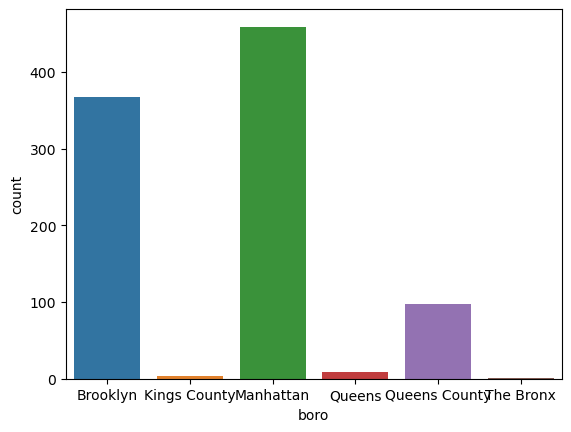

In [48]:
merged_dfstations=pd.read_parquet('2019-stations.parquet')
merged_dfstations.loc[merged_dfstations['station name'].isin(['Yankee Ferry Terminal', 'Picnic Point', 'Soissons Landing'])]
sns.countplot(data=merged_dfstations, x="boro") ;

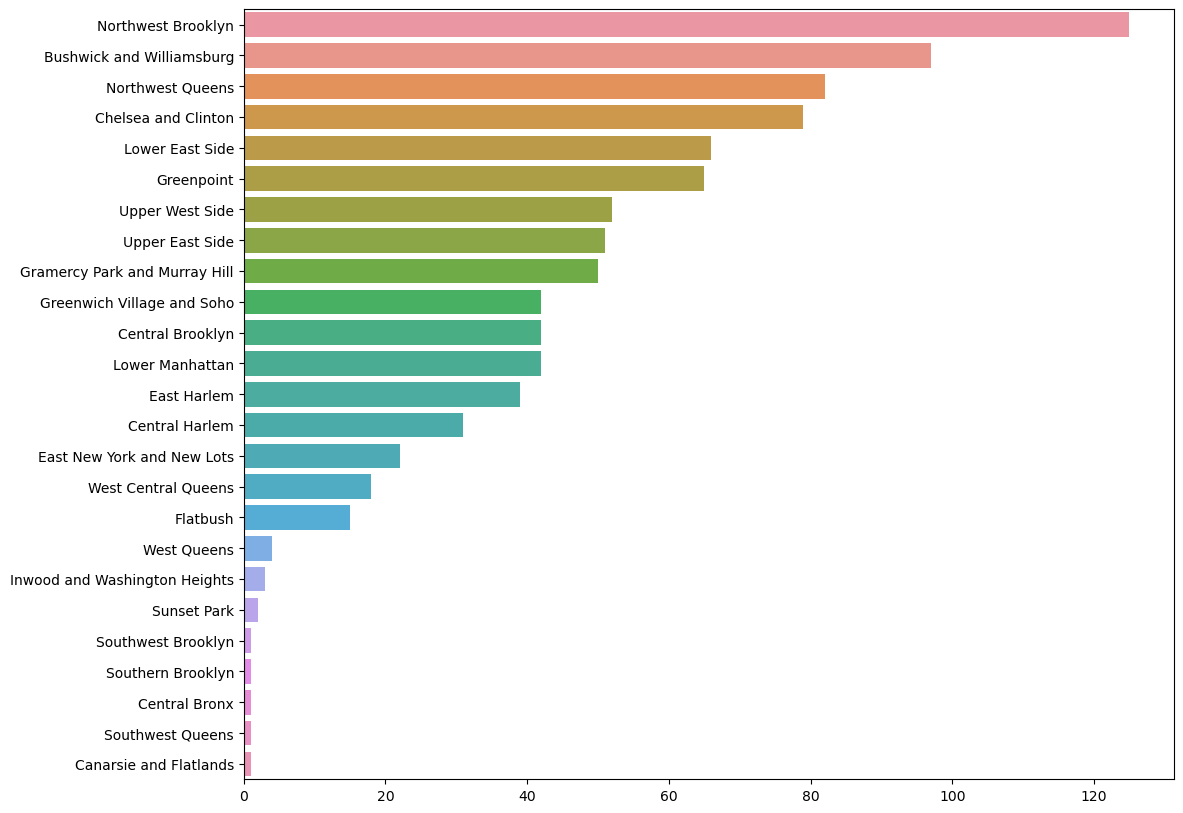

In [49]:
nabes = merged_dfstations['Neighborhood'].value_counts()[:25]
plt.figure(figsize=(12,10))
sns.barplot( x=nabes.values , y=list(nabes.index),  orient="h"  ) ;

### Combining station location with trip data

In [50]:
# Ensure the data types are consistent for merging
data_2019['start station id'] = data_2019['start station id'].astype(str)
data_2019['end station id'] = data_2019['end station id'].astype(str)
merged_dfstations['stationid'] = merged_dfstations['stationid'].astype(str)

# First merge for start station information
dfa_start = pd.merge(data_2019, merged_dfstations[['stationid', 'boro', 'Neighborhood', 'zipcode']], 
                     how='left', left_on='start station id', right_on='stationid')

# Rename columns to reflect start station info
dfa_start.rename(columns={'boro': 'start station boro', 
                          'Neighborhood': 'start station Neighborhood', 
                          'zipcode': 'start station zipcode'}, inplace=True)

# Drop the redundant 'stationid' column after the first merge
dfa_start.drop('stationid', axis=1, inplace=True)

# Second merge for end station information
dfa = pd.merge(dfa_start, merged_dfstations[['stationid', 'boro', 'Neighborhood', 'zipcode']], 
               how='left', left_on='end station id', right_on='stationid', suffixes=(None, ' end'))

# Rename columns to reflect end station info
dfa.rename(columns={'boro': 'end station boro', 
                    'Neighborhood': 'end station Neighborhood', 
                    'zipcode': 'end station zipcode'}, inplace=True)

# Drop the redundant 'stationid' column after the second merge
dfa.drop('stationid', axis=1, inplace=True)

In [51]:
nan_count = dfa['end station Neighborhood'].isna().sum()
print(f"Number of NaNs in the 'neighborhood' column: {nan_count}")

Number of NaNs in the 'neighborhood' column: 213771


In [52]:
dfa.iloc[:4]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,gender,tripduration_minutes,age,age_group,start station boro,start station Neighborhood,start station zipcode,end station boro,end station Neighborhood,end station zipcode
0,320,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,...,1,5.333333,48,45-54,Manhattan,Upper West Side,10024,Manhattan,Upper West Side,10024
1,316,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,...,1,5.266667,55,55-64,Manhattan,Gramercy Park and Murray Hill,10178,Manhattan,Gramercy Park and Murray Hill,10016
2,591,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,...,1,9.850000,32,25-34,Manhattan,Upper West Side,10024,Manhattan,Upper East Side,10075
3,2719,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,...,1,45.316667,29,25-34,Manhattan,Lower East Side,10009,Manhattan,Chelsea and Clinton,10011


In [113]:
# dfa.to_parquet('2019-data-with-neighborhoods.parquet')

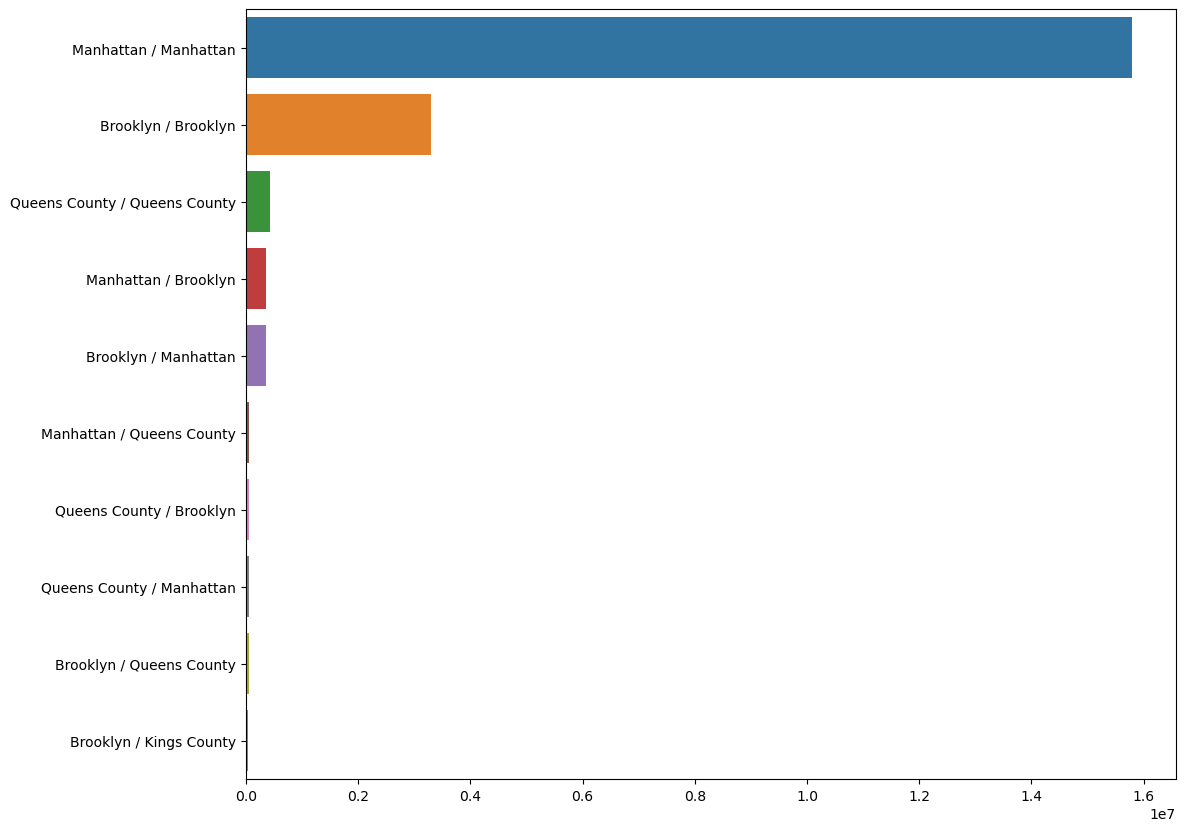

In [53]:
trips=dfa.value_counts(['start station boro','end station boro'])[:10]
trip_names=[trips.index[t][0] + ' / ' + trips.index[t][1] for t in range(len(trips)) ]
plt.figure(figsize=(12,10))
sns.barplot( x= list(trips.values), y = trip_names, orient="h") ;

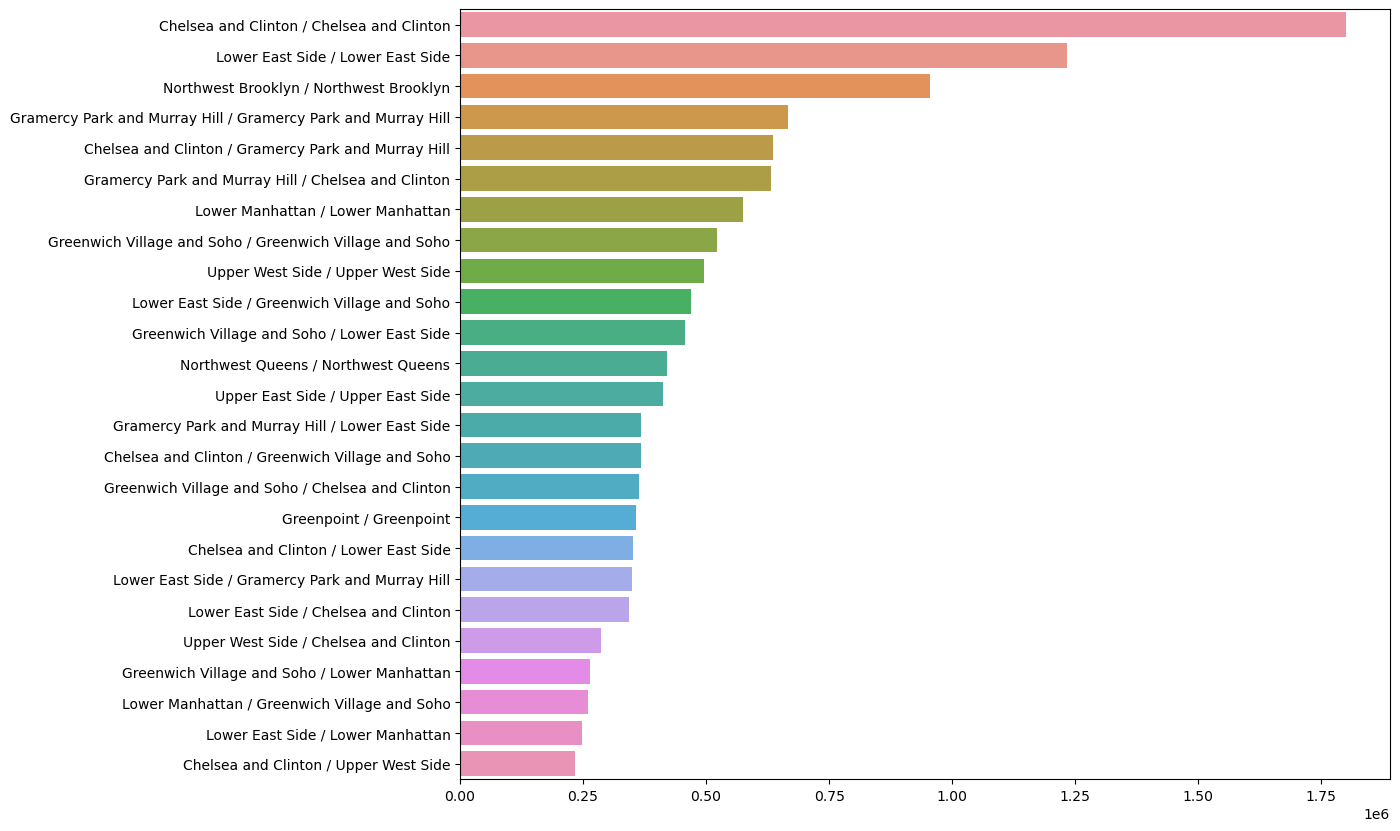

In [54]:
trips=dfa.value_counts(['start station Neighborhood','end station Neighborhood'])[:25]
trip_names=[trips.index[t][0] + ' / ' + trips.index[t][1] for t in range(len(trips)) ]
plt.figure(figsize=(12,10))
sns.barplot( x= list(trips.values), y = trip_names, orient="h") ;

# Rebalancing Analysis

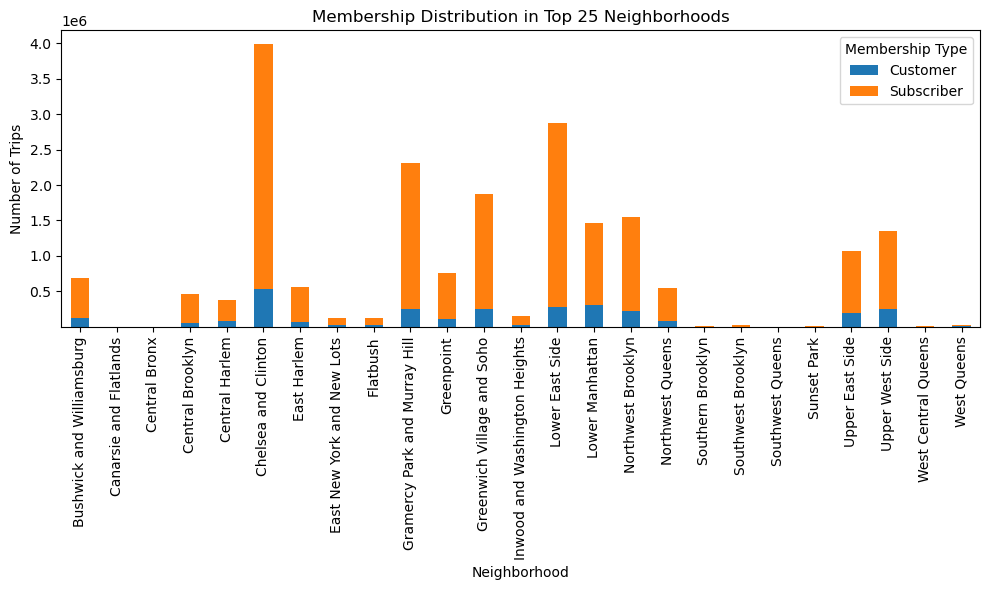

In [59]:
# Aggregate trips by start and end neighborhoods
neighborhood_counts = pd.concat([dfa['start station Neighborhood'], dfa['end station Neighborhood']]).value_counts()

# Get the top 10 neighborhoods
top_10_neighborhoods = neighborhood_counts.head(25).index.tolist()
df_top_10 = dfa[dfa['start station Neighborhood'].isin(top_10_neighborhoods) | dfa['end station Neighborhood'].isin(top_10_neighborhoods)]
# Aggregate data to see membership distribution in top 10 neighborhoods
membership_distribution = df_top_10.groupby(['start station Neighborhood', 'usertype']).size().unstack(fill_value=0)


# Assuming you're visualizing start neighborhoods
membership_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Membership Distribution in Top 25 Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Trips')
plt.xticks(rotation=90)
plt.legend(title='Membership Type')
plt.tight_layout()
plt.show()